In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.__version__

'2.8.0'

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
df = pd.get_dummies(df,drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.2, random_state=10)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()

model.add(Dense(9,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.06),loss='mae')

In [15]:
history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 9793.9082
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7241.8472
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 6745.8564
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 6505.8315
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 6366.5332
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6074.4727
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 5740.9644
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 5012.1885
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 4210.2935
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3802.1853
Epoch 11/100
34/34 [==============================] - 0s 3ms/step - loss: 3502.7300
Epoch 12/100
34/34 [==============================] - 0s 3ms/step - loss: 3343.0442
E

34/34 [==============================] - 0s 3ms/step - loss: 2166.0811
Epoch 99/100
34/34 [==============================] - 0s 3ms/step - loss: 2399.5273
Epoch 100/100
34/34 [==============================] - 0s 3ms/step - loss: 2200.2314


In [16]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2601.8926


2601.892578125

Text(0, 0.5, 'loss')

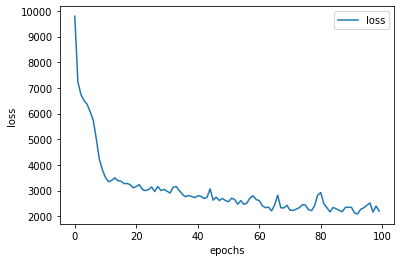

In [19]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')